In [1]:
import numpy as np
from numpy.random import RandomState
np.random.seed(1)

from tsne import bh_sne
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import os
import os.path
import glob

from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
imagedir = "CG_Resized"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.jpg'))  # assuming the images are stored as 'jpg'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height,channels = (224,224,3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.jpg'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        list_paths.append(os.path.join(os.getcwd(),img_file))
        img = image.load_img(img_file, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:              CG	Number of images: 8394
Label: 1	Family:            FOTO	Number of images: 8002
Processing images ...
Images processed: 16396


In [4]:
X.shape

(16396, 224, 224, 3)

In [5]:
X = np.reshape(X,(X.shape[0],-1))

In [6]:
X.shape

(16396, 150528)

In [7]:
print("Running t-SNE ...")
#vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))
vis_data = TSNE(n_components=2, random_state=1).fit_transform(X)

Running t-SNE ...


In [8]:
np.save("TSNE-cg_resized-RGBfeatures.npy", vis_data)

In [ ]:
vis_data = np.load("TSNE-cg_resized-RGBfeatures.npy")

Plotting t-SNE ...


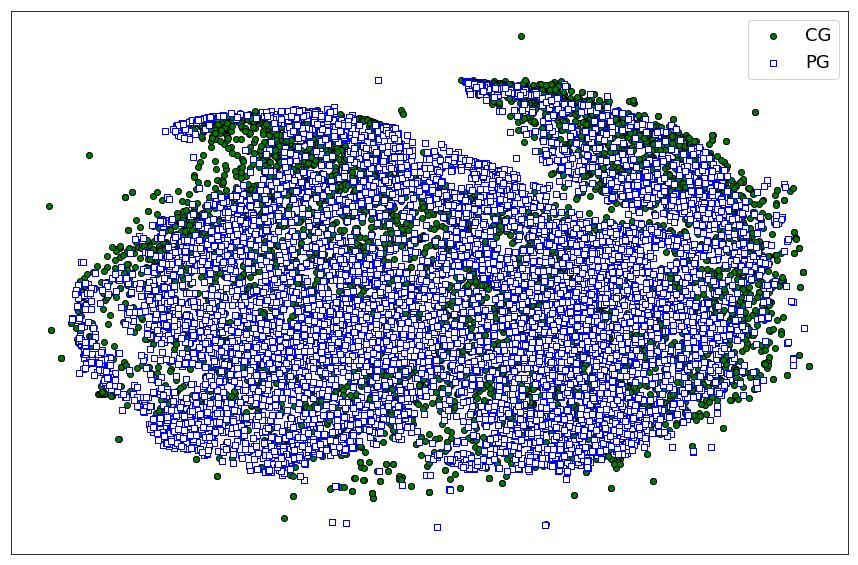

In [9]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(15, 10)
plt.scatter(vis_data[y.astype(int)==0, 0], vis_data[y.astype(int)==0, 1], c='green', marker='o', edgecolors="black", label="CG")
plt.scatter(vis_data[y.astype(int)==1, 0], vis_data[y.astype(int)==1, 1], c='white', marker='s', edgecolors="blue", label="PG")
plt.clim(-0.5, len(list_fams)-0.5)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.legend(loc="upper right", prop={'size': 18})
plt.savefig('TSNE-cg_resized-RGBFeatures.pdf', format='pdf')                  
plt.show()